#SALES PROJECT


##IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##LOADING THE DATASET

Just loading and recognizing the dataset.
https://www.kaggle.com/aungpyaeap/supermarket-sales

In [ ]:
df = pd.read_csv('supermarket_sales.csv')

In [ ]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


These data are about a supermarket that has 3 branches (A, B, C) for 3 months data. It's a good dataset to practice about data analysis.
It has some limitations: the ID is about the sale and we don't have the product ID to analyze which is the best selling product; the tax column is not 5% but 4.76% as in the gross margin percentage.

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

I noticed that the columns were not standardized and decided to turn them into snake case as a good practice.

In [ ]:
#Puting columns as standard upper snakecase and string type#
df.columns = df.columns.astype('str')

In [ ]:
df.columns = df.columns.str.upper()

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns = df.columns.map(lambda x : x.replace('-', '_').replace(' ', '_'))

In [ ]:
df.columns

Index(['INVOICE_ID', 'BRANCH', 'CITY', 'CUSTOMER_TYPE', 'GENDER',
       'PRODUCT_LINE', 'UNIT_PRICE', 'QUANTITY', 'TAX_5%', 'TOTAL', 'DATE',
       'TIME', 'PAYMENT', 'COGS', 'GROSS_MARGIN_PERCENTAGE', 'GROSS_INCOME',
       'RATING'],
      dtype='object')

##**Data Dictionary**

###**INVOICE_ID** - Automatically generated sales receipt invoice identification number. (object)
###**BRANCH** - 3 branches are available, identified by A, B e C.) (object)
###**CITY** - Supermarket location. (object)
###**CUSTOMER_TYPE** - Type of customers, registered by Members for customers with membership card and Normal for customers without membership card. (object)
###**GENDER** - Customer's gender. (object)
###**PRODUCT_LINE** - Product groups. (object)
###**UNIT_PRICE** - Unit price $. (float64)
###**QUANTITY** - Number of products purchased by customer. (int64)
###**TAX_5%** - 5% tax rate for customer purchase. (float64)
###**TOTAL** - Total price including taxes. (float64)
###**DATE** - Purchase date. (datetime64[ns])
###**TIME** - Purchase time (10h to 21h). (object)
###**PAYMENT** - Payment used by the customer for the purchase ('Ewallet' 'Cash' 'Credit card'). (object)
###**COGS** - Product's costs (float64)
###**GROSS_MARGIN_PERCENTAGE** - Gross percentage margin. (float64)
###**GROSS_INCOME** - Gross Income. (float64)
###**RATING** - Customer rating about the experience. (float64)

##Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INVOICE_ID               1000 non-null   object 
 1   BRANCH                   1000 non-null   object 
 2   CITY                     1000 non-null   object 
 3   CUSTOMER_TYPE            1000 non-null   object 
 4   GENDER                   1000 non-null   object 
 5   PRODUCT_LINE             1000 non-null   object 
 6   UNIT_PRICE               1000 non-null   float64
 7   QUANTITY                 1000 non-null   int64  
 8   TAX_5%                   1000 non-null   float64
 9   TOTAL                    1000 non-null   float64
 10  DATE                     1000 non-null   object 
 11  TIME                     1000 non-null   object 
 12  PAYMENT                  1000 non-null   object 
 13  COGS                     1000 non-null   float64
 14  GROSS_MARGIN_PERCENTAGE  

In [ ]:
df.describe()

,UNIT_PRICE,QUANTITY,TAX_5%,TOTAL,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


A **heatmap** is a graphical representation of data that uses a system of color-coding to represent different values. In this case I used heatmap to get a better view of correlation. Correlation is one of the most basic statistical measures of how two different things might be related. The closer to 1, greater the relationship between two variables.

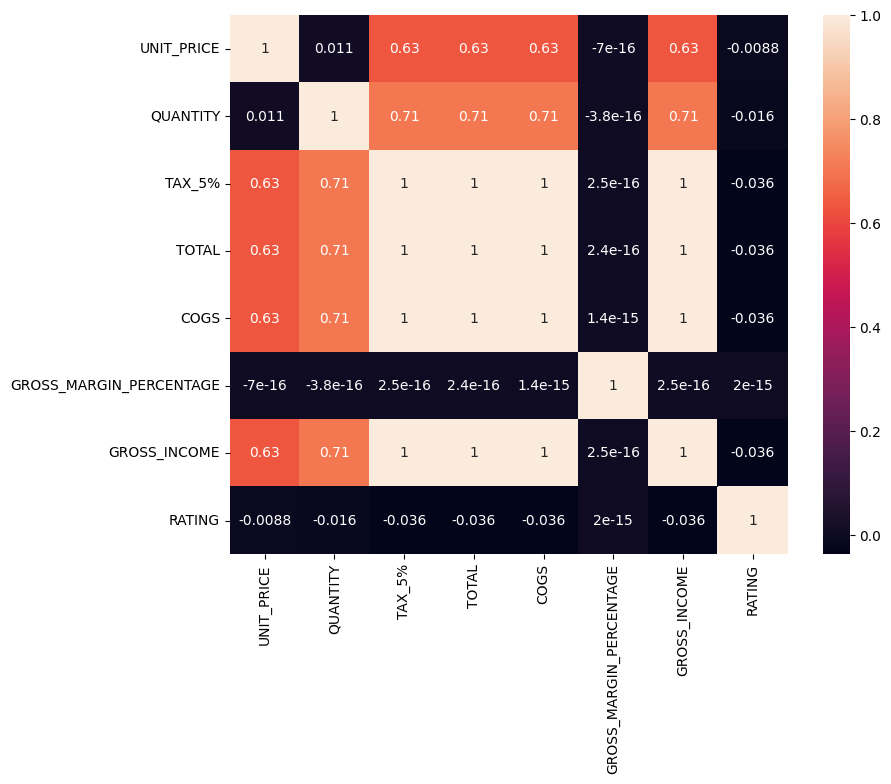

In [ ]:
plt.figure(figsize = (9,7))
sns.heatmap(df.corr(), annot =True)

Checking null value

In [ ]:
df.isnull().sum() #anyone null value

INVOICE_ID                 0
BRANCH                     0
CITY                       0
CUSTOMER_TYPE              0
GENDER                     0
PRODUCT_LINE               0
UNIT_PRICE                 0
QUANTITY                   0
TAX_5%                     0
TOTAL                      0
DATE                       0
TIME                       0
PAYMENT                    0
COGS                       0
GROSS_MARGIN_PERCENTAGE    0
GROSS_INCOME               0
RATING                     0
dtype: int64

###1 - Number of unique values in each column:

In [ ]:
df.columns

Index(['INVOICE_ID', 'BRANCH', 'CITY', 'CUSTOMER_TYPE', 'GENDER',
       'PRODUCT_LINE', 'UNIT_PRICE', 'QUANTITY', 'TAX_5%', 'TOTAL', 'DATE',
       'TIME', 'PAYMENT', 'COGS', 'GROSS_MARGIN_PERCENTAGE', 'GROSS_INCOME',
       'RATING'],
      dtype='object')

In [ ]:
#How much unique numbers we have in each column.
for i in df.columns:
    print(i)
    print(df[i].nunique())
  

INVOICE_ID
1000
BRANCH
3
CITY
3
CUSTOMER_TYPE
2
GENDER
2
PRODUCT_LINE
6
UNIT_PRICE
943
QUANTITY
10
TAX_5%
990
TOTAL
990
DATE
89
TIME
506
PAYMENT
3
COGS
990
GROSS_MARGIN_PERCENTAGE
1
GROSS_INCOME
990
RATING
61


In [ ]:
#If you want to know how much and what are the uniques#
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print(df[i].unique())
  

###2 - RATING Boxpot by branch

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


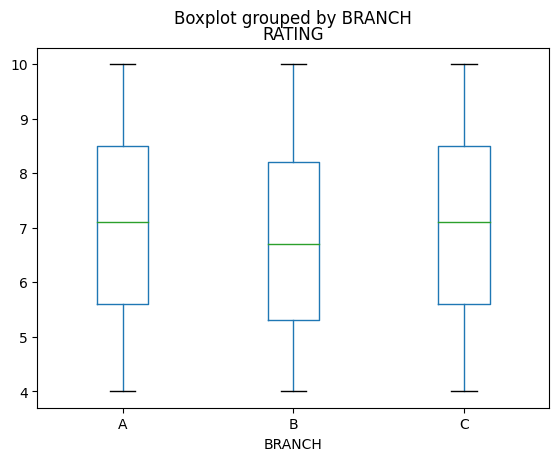

In [ ]:
df.boxplot(by ='BRANCH', column =['RATING'], grid = False) 

In this boxplot we can see that customers have similarly rated the 3 branches, but branch B with the lowest median.

###3 - Items amount per day

In [ ]:
#Variable created to group the quantity per day#
quant_day = df.groupby('DATE', sort=True).agg({'QUANTITY': 'sum'}).sort_values(by="DATE", key=pd.to_datetime).reset_index()

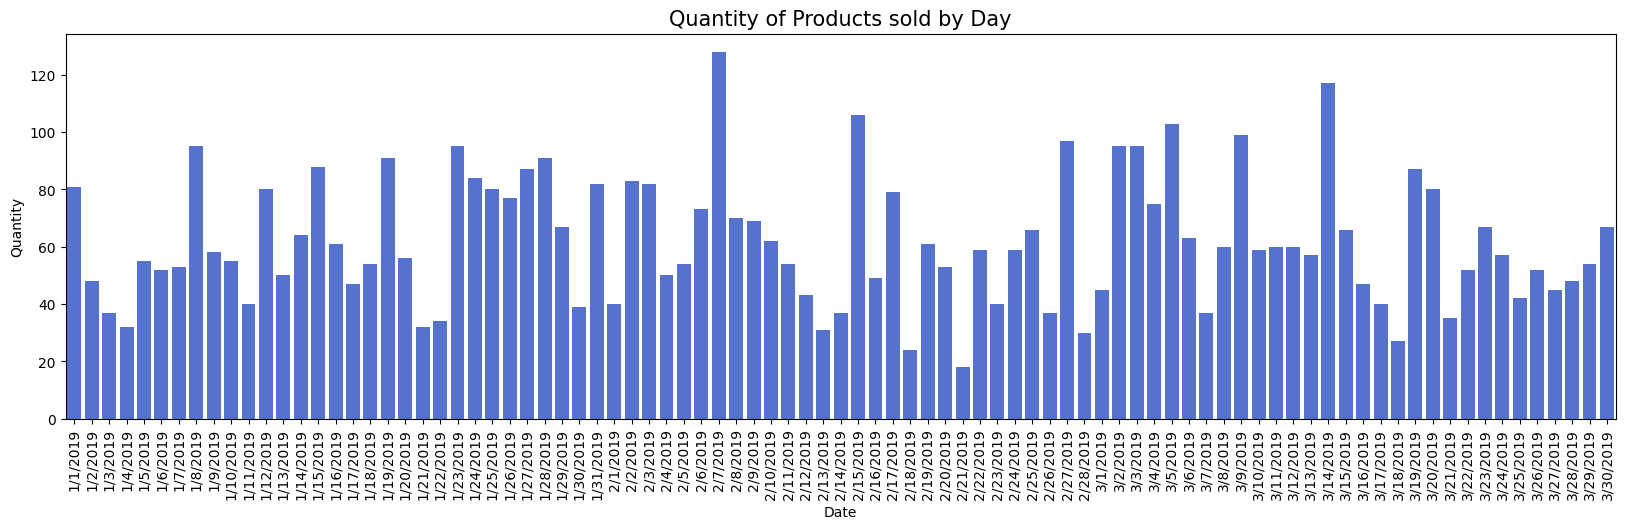

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='DATE', y='QUANTITY', data=quant_day, color='royalblue')
plt.title('Quantity of Products sold by Day',fontsize=15)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

This bar chart is a good way to observe the seasonality in the output of products and check the days when less and more are sold.

###4- Product's value per day

In [ ]:
#Variable created to group the value per day#
value_day = df.groupby('DATE', sort=True).agg({'TOTAL': 'sum'}).sort_values(by="DATE", key=pd.to_datetime).reset_index()

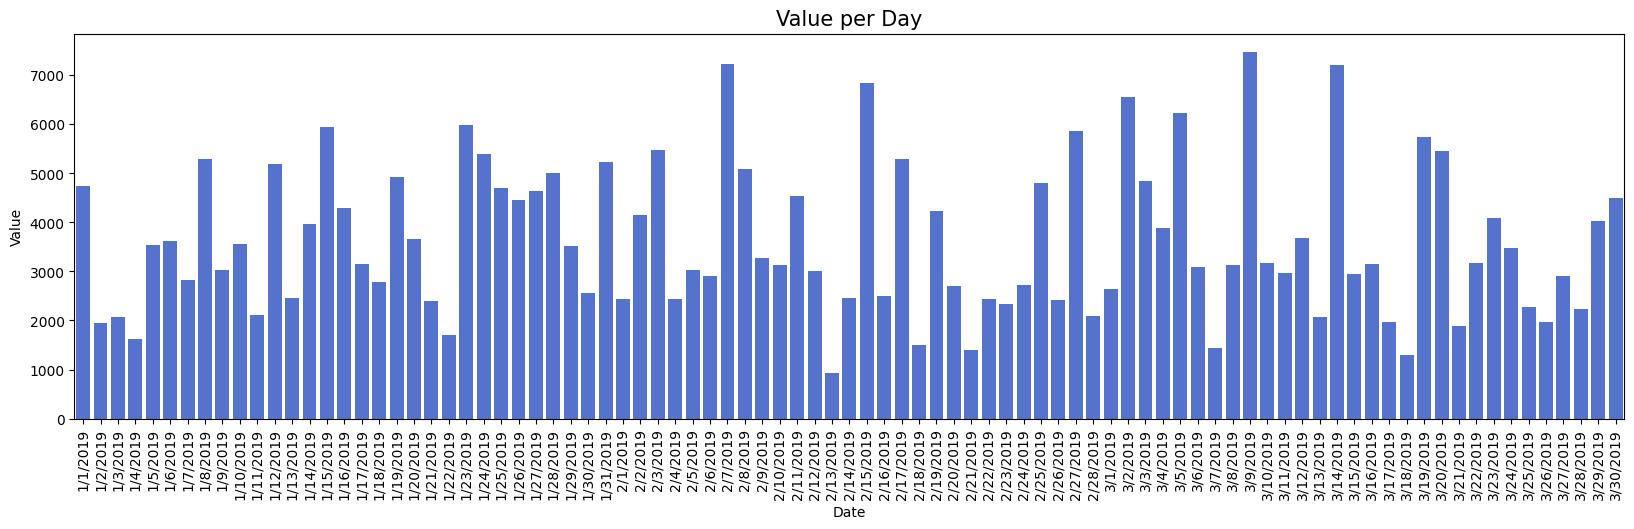

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='DATE', y='TOTAL', data=value_day, color='royalblue')
plt.title('Value per Day',fontsize=15)
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

Graph similar to 3 but made to see the seasonality and peaks of the invoiced amount

###5 - QUANTITY by Product Line (boxplot)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, 'Boxplot "Quantity by Product Line"')

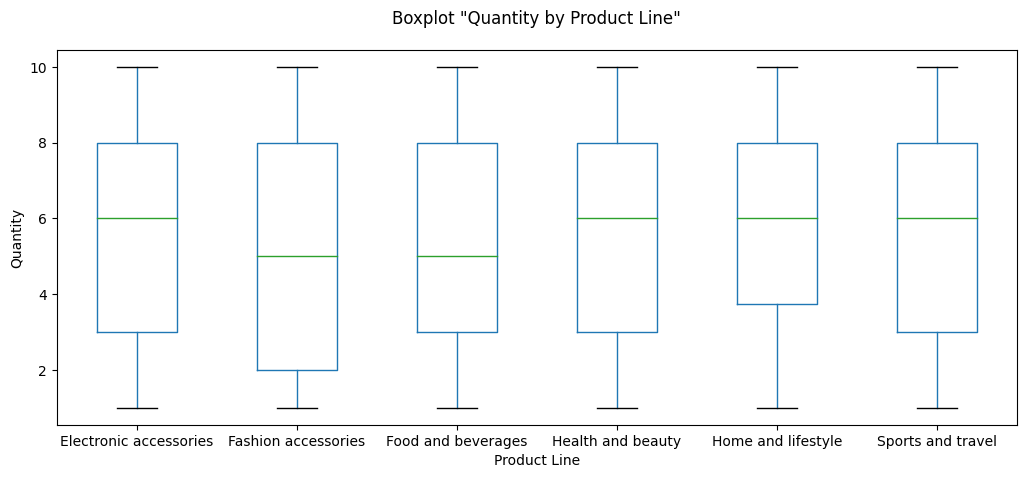

In [ ]:
df.boxplot(by ='PRODUCT_LINE', column ='QUANTITY', grid = False, figsize=(12,5)) 
plt.ylabel('Quantity')
plt.xlabel('Product Line')
plt.title('')
plt.suptitle('Boxplot "Quantity by Product Line"')

We can see in this graph that the product line that sells the least amount per sale is the Fashion accessories.

###6 - Sales by Product Line

Text(0, 0.5, '')

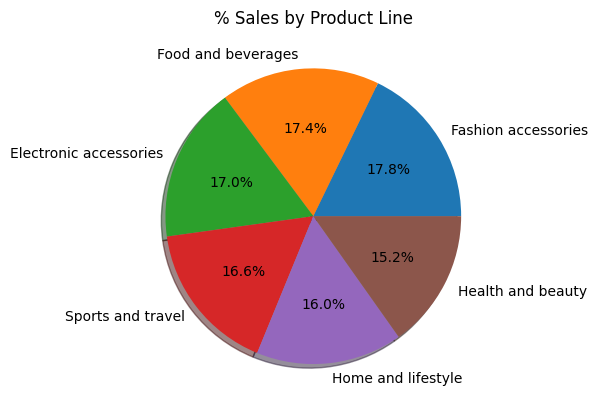

In [ ]:
#Number of sales of each product line#

df['PRODUCT_LINE'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('% Sales by Product Line')
plt.ylabel('')

In the previous graph we saw that the Fashion accessories product line was the one that sold the least products per sale, but in this graph we can see that most of the store's sales are made by this sector.

In [ ]:
line_quant = df.groupby('PRODUCT_LINE').agg({'QUANTITY': 'sum'}).reset_index() 

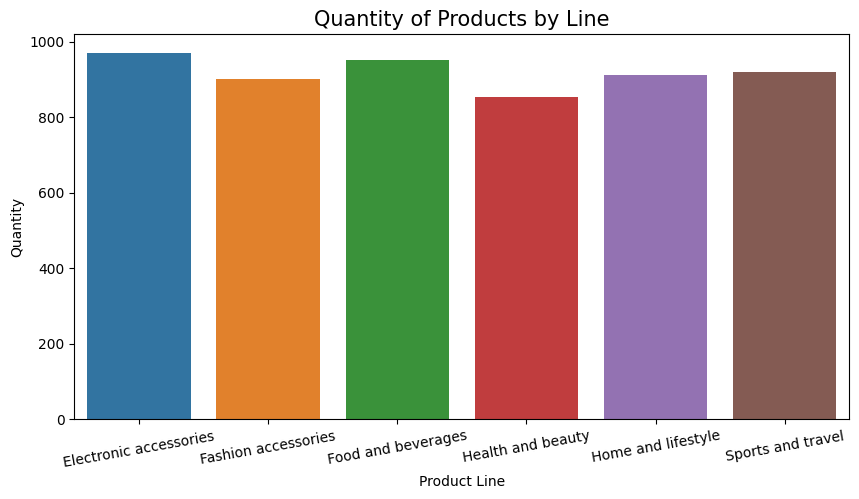

In [ ]:
#Number of products sold by PRODUCT_LINE#
plt.style.use('default')
plt.figure(figsize=(10,5))
sns.barplot(x='PRODUCT_LINE', y='QUANTITY', data=line_quant)
plt.title('Quantity of Products by Line',fontsize=15)
plt.xlabel('Product Line')
plt.ylabel('Quantity')
plt.xticks(rotation=10)
plt.show()

Here we can see that the largest volume of products sold is in the sector of Electronic accessories. Analyzing this chart and the previous one, we can see that the Health and beauty line is the one that makes the least sales and also has low product volumes sold.

###7 - Understand usability of each payment method

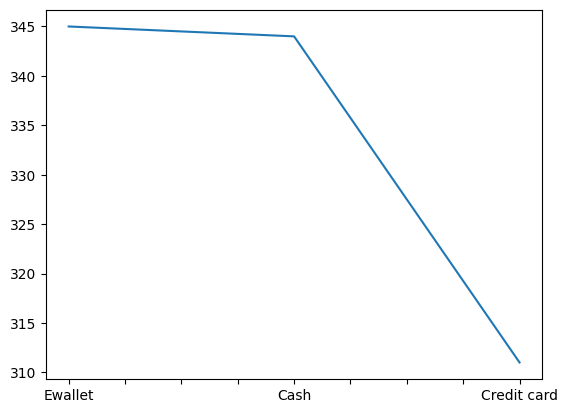

In [ ]:
df['PAYMENT'].value_counts().plot(kind='line')

The least used payment method in all branches is Credit card.

###8 - How much each branch uses each payment method?

In [ ]:
branch = df['BRANCH']
payment = df['PAYMENT']

In [ ]:
branchxpayment = pd.crosstab(branch, payment)
branchxpayment

PAYMENT,Cash,Credit card,Ewallet
BRANCH,,,
A,110,104,126
B,110,109,113
C,124,98,106


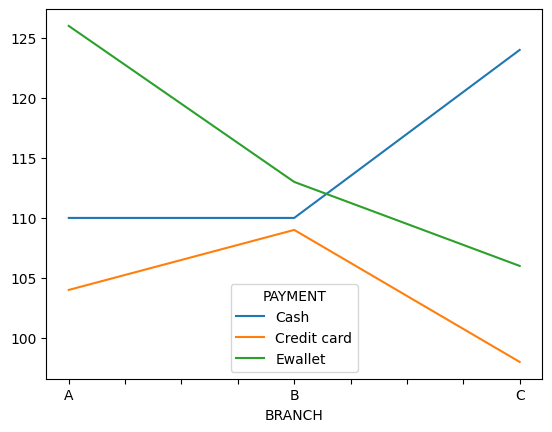

In [ ]:
branchxpayment.plot(kind='line')

We can say that the most conservative affiliate in the payment method is C, because they use a lot of money and less Ewallet. And the most modern is the A because it uses a lot of Ewallet and less cash.

###9 - Costumer types by BRANCH

In [ ]:
customer_type = df['CUSTOMER_TYPE']

In [ ]:
mycrosstable = pd.crosstab(branch, customer_type)
mycrosstable

CUSTOMER_TYPE,Member,Normal
BRANCH,,
A,167,173
B,165,167
C,169,159


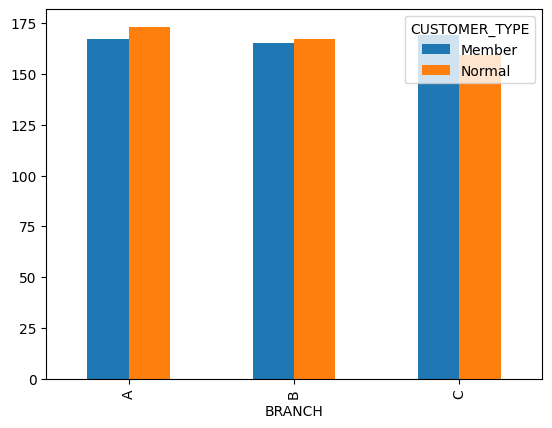

In [ ]:
mycrosstable.plot(kind='bar')

We can say that the number of member customers is very similar to the normal customers. The biggest diference is at branch C where they have most member customers.

###10 - Visualizing a GENDER based coparison for different product type.

In [ ]:
gender = df['GENDER']
productline = df['PRODUCT_LINE']

In [ ]:
gendexline = pd.crosstab(gender, productline)
gendexline

PRODUCT_LINE,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
GENDER,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


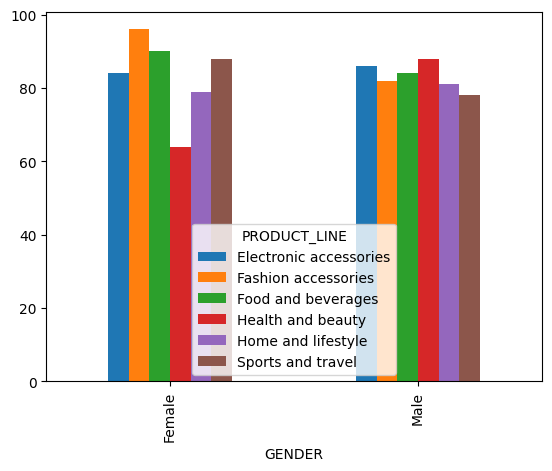

In [ ]:
gendexline.plot(kind='bar')

In these two graphs we can see a curious phenomenon where the female customers consumes less 'Health and beauty' products and more 'Sports and travel' than the male customers. It can be said that this is an atypical fact, but positively breaking paradigms.

In [ ]:
linexgender = pd.crosstab(productline, gender)
linexgender

GENDER,Female,Male
PRODUCT_LINE,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


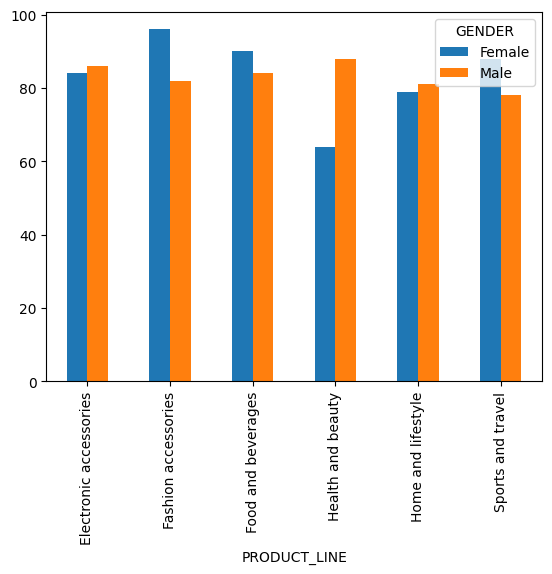

In [ ]:
#Just another way to analyse the same.
linexgender.plot(kind='bar')

###11 - Finding which branch has a better sale for which product



In [ ]:
#by Product Line#
linexbranch = pd.crosstab(branch, productline)
linexbranch

PRODUCT_LINE,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
BRANCH,,,,,,
A,60,51,58,47,65,59
B,55,62,50,53,50,62
C,55,65,66,52,45,45


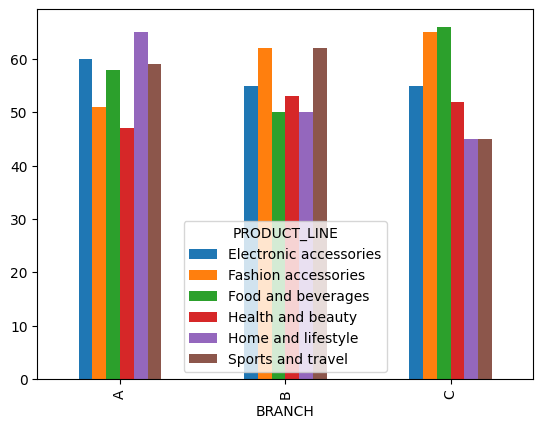

In [ ]:
linexbranch.plot(kind='bar')

**Best seller by product line:**

---


A: Electronic accessories, Home and lifestyle;

---


B: Sports and travel, Health and Beauty;

---


C: Fashion accessories, Food and beverages.

In [ ]:
linexbranch = pd.crosstab(productline, branch)

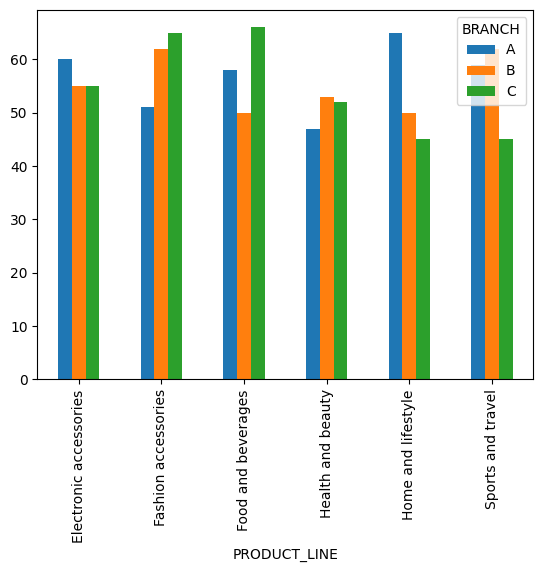

In [ ]:
linexbranch.plot(kind='bar')

In [ ]:
#by product#
df['INVOICE_ID'].nunique()

1000

We can't plot product by branch, because we don't have the 'Product ID' just have the 'Invoice ID' as the sale's ID.